In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.metrics import mean_squared_error, r2_score

# Problem 2.1 Deterministic nature of coin flip

In [2]:
# Table P2.1 - Resulsts of a coin throw from a given angle and height above the table
# H: 1, T: 0
flip = pd.DataFrame(
    data = {
        'angle': [0, 45, 90, 135, 180, 225, 270, 315],
        0.2: [0, 1, 1, 1, 1, 1, 1, 0],
        0.4: [1, 0, 1, 1, 1, 0, 0, 1],
        0.6: [0, 0, 0, 0, 0, 1, 0, 1],
        0.8: [0, 0, 0, 1, 1, 0, 0, 0],
        1.0: [1, 0, 1, 0, 1, 0, 1, 0]
    })
flip = flip.set_index('angle')
flip

,0.2,0.4,0.6,0.8,1.0
angle,,,,,
0,0,1,0,0,1
45,1,0,0,0,0
90,1,1,0,0,1
135,1,1,0,1,0
180,1,1,0,1,1
225,1,0,1,0,0
270,1,0,0,0,1
315,0,1,1,0,0


In [3]:
# Table P2.2 - Probabilities of getting head for each angle - height combination
# H: 1, T: 0
flip_p = pd.DataFrame(
    data = {
        'angle': [0, 45, 90, 135, 180, 225, 270, 315],
        0.2: [0.05, 0.03, 0.05, 0.02, 0.03, 0.  , 0.03, 0.02],
        0.4: [0.03, 0.02, 0.03, 0.03, 0.02, 0.01, 0.  , 0.03],
        0.6: [0.02, 0.01, 0.01, 0.04, 0.02, 0.04, 0.03, 0.03],
        0.8: [0.04, 0.05, 0.03, 0.  , 0.  , 0.03, 0.01, 0.02],
        1.0: [0.04, 0.02, 0.02, 0.04, 0.03, 0.02, 0.04, 0.01]
    })
flip_p = flip_p.set_index('angle')
flip_p

,0.2,0.4,0.6,0.8,1.0
angle,,,,,
0,0.05,0.03,0.02,0.04,0.04
45,0.03,0.02,0.01,0.05,0.02
90,0.05,0.03,0.01,0.03,0.02
135,0.02,0.03,0.04,0.00,0.04
180,0.03,0.02,0.02,0.00,0.03
225,0.00,0.01,0.04,0.03,0.02
270,0.03,0.00,0.03,0.01,0.04
315,0.02,0.03,0.03,0.02,0.01


## Problem 2.1.1
**Suppose that all combinations of angles and heights are equally likely to be chosen. What is the probability that the coin lands heads up?**

**Answer:** The probability that the coin lands heads up is `0.475`, which corresponds to the count of all possible heads in the table divided by the total number of possible outcomes.

In [4]:
flip.sum().sum() / (flip.shape[0] * flip.shape[1])

0.475

## Problem 2.1.2

**Now suppose that
some combinations of angles and
heights are more likely to be chosen
than others, with the probabilities
shown in Table P2.2. What are
the new probabilities that the coin
lands heads up?**

**Answer:** The probability that the coin lands heads up based on the provided probabilities is `0.5`, which corresponds to the sum of all probabilities of heads in the table `flip_p`


In [5]:
(flip * flip_p).sum().sum()

0.5

## Problem 2.1.3

**We force the cointhrower
to throw the coin at an
angle of 45 degrees. What is the
probability that the coin lands
heads up?**

**Answer:** The probability of the coin landing heads up given that the angle is 45 degrees is `0.3`, which corresponds to the sum of all probabilities of heads in the table `flip_p` where the angle is 45 degrees, divided by the total probability of the angle being 45 degrees.

In [6]:
(flip.loc[45] * flip_p.loc[45]).sum() / flip_p.loc[45].sum()

0.23076923076923075

## Problem 2.1.4

**We force the cointhrower
to throw the coin at a
height of 0.2m. What is the probability
that the coin lands heads up?**

**Answer:** The probability of the coin landing heads up given that the height is 0.2m is `0.16`, which corresponds to the sum of all probabilities of heads in the table `flip_p` where the height is 0.2m, divided by the total probability of the height being 0.2m.

In [7]:
(flip[0.2] * flip_p[0.2]).sum() / flip_p[0.2].sum()

0.6956521739130433

## Problem 2.1.5

**If we constrained
the angle and height to be fixed,
what would happen in repetitions
of the same experiment?**

**Answer:** We will get the same results

# Problem 2.3 - Model choice

In [66]:
# Read data
short = pd.read_csv('../data/subjective_overfitShort.csv')

In [72]:
# Fit a linear model using np.polyfit, which minimizes the 
# squared error for a given degree polynomial
lin_coef = np.polyfit(short['x'], short['y'], deg = 1)
lin_coef

array([1.02629769, 2.85487213])

In [73]:
# Fit a quintic model using np.polyfit, which minimizes the
# squared error for a given degree polynomial
quin_coef = np.polyfit(short['x'], short['y'], deg = 5)
quin_coef

array([  0.02147938,  -0.53010971,   4.46158052, -15.03077442,
        20.87898653,  -8.669772  ])

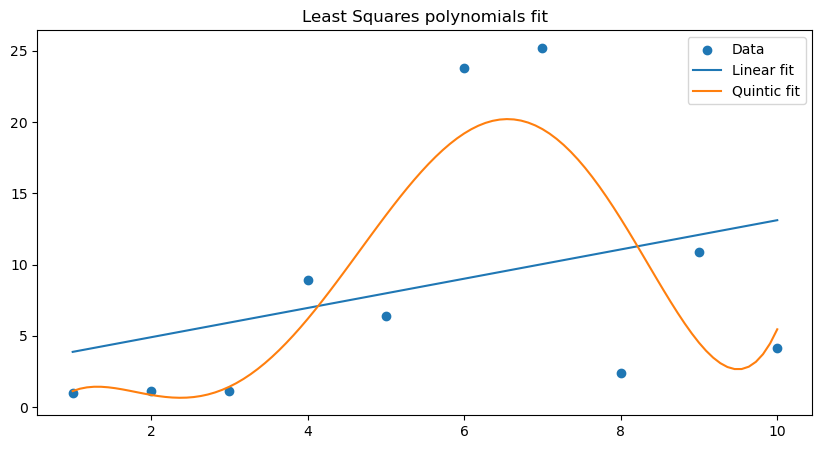

In [74]:
# Define plt size
plt.rcParams['figure.figsize'] = (10, 5)

# Plot the data
plt.title('Least Squares polynomials fit')
plt.scatter(short['x'], short['y'], label = 'Data')
plt.plot(short['x'], np.polyval(lin_coef, short['x']), label = 'Linear fit')

# A linespace is used to smooth the line of the quintic fit
xlsp = np.linspace(short['x'].min(), short['x'].max(), 100)
plt.plot(xlsp, np.polyval(quin_coef, xlsp), label = 'Quintic fit')

plt.legend()
plt.show()

## Problem 2.3.1

**Fit a linear regression model using least squares. How reasonable is the fit?**

**Answer:** The fit is underfitting the data because the model is too simple to capture the variability in the data.

## Problem 2.3.2

**Fit a quintic (powers up to the fifth) model to the data. How does its fit compare
to that of the linear model?**

**Answer:** The fit is better than the linear model but it is probably overfitting the data.

## Problem 2.3.3

**You are now given new data contained within `subjective_overfitLong`.
csv. This contains data on 1000 replications of the same experiment, where the x values are held
fixed. Using the least squares fits from the first part of this question, compare the performance of the linear regression model with that of the quintic model.**

**Answer:** As the RMSE of the linear model is lower than the RMSE of the quintic model, the linear model is a better fit for the data. Probably the quintic model is fitting the noise and not the trend.

In [88]:
# RMSE for linear model
lin_x = np.polyval(lin_coef, range(1, 11))
lin_rmse = ((((long - lin_x.T)**2).sum(axis=1) / lin_x.shape[0]) ** 0.5).mean()
lin_rmse

12.268235965678471

In [89]:
# RMSE for quintic model
quin_x = np.polyval(quin_coef, range(1, 11))
quin_rmse = ((((long - quin_x.T)**2).sum(axis=1) / quin_x.shape[0]) ** 0.5).mean()
quin_rmse

14.074163642222931